In [15]:
%load_ext watermark
%watermark -p pandas,networkx,numpy,matplotlib -v -m -n

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Fri Sep 02 2016 

CPython 3.5.2
IPython 5.1.0

pandas 0.18.1
networkx 1.11
numpy 1.11.1
matplotlib 1.5.2

compiler   : GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)
system     : Darwin
release    : 14.5.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


# Creating Graphs

- Create graph object
- Add nodes and edges
- Add attributes

In [31]:
import networkx as nx # for using graphs
import pandas as pd # for loading in and exploring data
import matplotlib.pyplot as plt # for plotting graphs
%matplotlib inline

In [29]:
# Create empty graph
G = nx.Graph()

## Add Nodes and Edges

In [17]:
G.add_node(1)
G.add_nodes_from([1,2])
G.add_node(3)

In [18]:
G.nodes()

[1, 2, 3]

**Note**: In `networkx 2.0`, several methods now return iterators

For more details see: https://networkx.github.io/documentation/development/reference/migration_guide_from_1.x_to_2.0.html

In [19]:
G.add_edge(1,2)

In [20]:
print("Number of nodes: %s" % G.number_of_nodes())
print("Nodes: %s" % G.nodes())
print()
print("Number of edges: %s" % G.number_of_edges())
print("Edges: %s" % G.edges())

Number of nodes: 3
Nodes: [1, 2, 3]

Number of edges: 1
Edges: [(1, 2)]


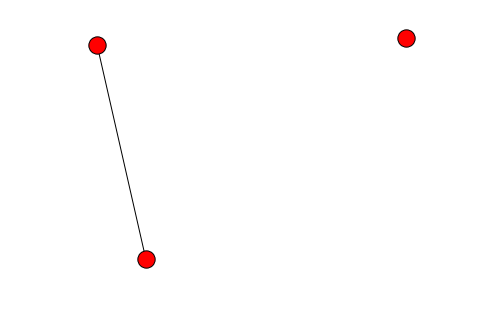

In [21]:

# https://plot.ly/ipython-notebooks/networks/
nx.draw(G)

## Grey's Anatomy Example
#### Loading from an Edge List

In [26]:
path  = "../data/"
data  = "ga_edgelist.csv"

ga_edges = pd.read_csv(path + data)

ga_edges.head()

,from,to
0,lexi,sloan
1,lexi,karev
2,owen,yang
3,owen,altman
4,sloan,torres


In [27]:
Ga = nx.from_pandas_dataframe(ga, source="from", target="to")

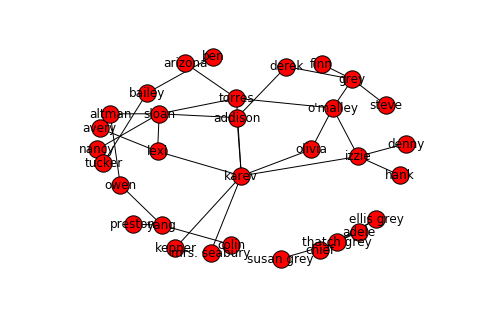

In [28]:
nx.draw_spring(Ga, with_labels=True)